In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [43]:
data = pd.read_csv("voice.csv")
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

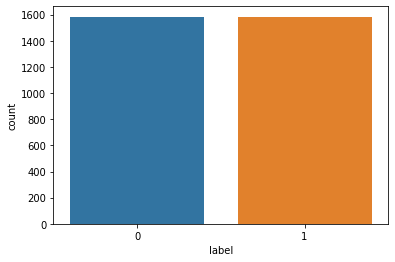

In [45]:
data['label'] = LabelEncoder().fit_transform(data['label'])
sea.countplot(x='label', data=data)

In [46]:
# corrmap = data.corr()
# fig, ax = plt.subplots(figsize=(20,20))
# sea.heatmap(corrmap)

In [47]:
X, y = data.drop('label', axis=1), data['label']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [48]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [49]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
pred = model.predict(x_test)
print(pred)

[0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0
 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1
 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1
 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1
 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0
 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1
 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1
 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0
 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1
 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 1 1 0 0 1 0 0 1 0 0 

In [51]:
acc = accuracy_score(y_test, pred)
print(acc)

0.9716088328075709
